# Report - Association between newly registered Passenger cars$^1$ and $CO2$ emissions in the European Union

**Niloofar**

**10.01.2024**

---

* [List of Acronyms](#List-of-acronyms)
* [Introduction](#Introduction)
* * [Environmental impacts of transport](#Environmental-impacts-of-transport)
  * [Main Question](#Main-Question)
* [Method](#Method)
* [Conclusion](#Conclusion)
* [Limitations](#Limitations)
* [Future work](#Future-work)
* [Refernces and Footnotes](#Refernces-and-Footnotes)

---

# List of acronyms

|        |                                                       |
|--------|-------------------------------------------------------|
| $CO_2$ | Carbon dioxide                                        |
| EU     | European Union                                        |
| GHG    | Greenhouse Gas                                        |
| WLTP   | Worldwide harmonized Light vehicles Test Procedures   |
| DALYs  | Disability-Adjusted Life Years                        |
| NEDC   | New European Driving Cycle                            |
| UNECE  | United Nations Economic Commission for Europe         |
| ITF    | International Transport Forum                         |
| OECD   | Organization for Economic Cooperation and Development |
| CSV    | Comma-separated values                                |
| GZ     | GNU zip                                               |
| URL    | Uniform Resource Locator                              |
| GEO    | Geodetic Earth Orbiting                               |
|        |                                                       |

---

# Introduction

Greenhouse gas emissions from transport account for 25% of the total EU greenhouse gas emissions. In order to achieve climate neutrality by 2050, as specified in the European Green Deal, there is a target to reduce greenhouse gas emissions from the transport sector by 90%. $^2$


## Environmental impacts of transport

In 2019, $CO_2$ emissions accounted for 98.8% of the exhaust GHG emissions from transport. $^3$

In the current era of globalization, a clean environment remains a crucial factor for the health of the population. Thus, improving air quality is a major focus of environmental policies, as it affects all aspects of nature, including humans. For these reasons, it is appropriate to take into account the health risks posed by greenhouse gas (GHG) emissions released into the atmosphere. With regard to global GHG emissions, there are concerns about the loss of protection of the ozone layer and it is very likely that climate change can be expected, which multiplies the environmental threat and has potentially serious global consequences.  $CO_2$ emissions have a dominant position among selected GHG emissions. The revealed positive link between $CO_2$ and DALYs indicated that a decrease in $CO_2$ may be associated with a decrease in DALYs, but it is also true that this cannot be done without reducing emissions of other combustion products. $^4$

In this report, the primary objective is to explore the correlation between automobile choices and $CO_2$ emissions. This report aims to examine the impact of selecting one type of car over another on $CO_2$ emissions and its consequent effects on various aspects of life. The objective is to comprehend how individuals' choices of car fuel contribute to the quantity of $CO_2$ emissions.


## Main Question

Is there any correlation between newly registered cars and Greenhouse gas emissions in the Europe? Is the type of car engine a significant factor contributing to climate change? What other vehicle features play a crucial role in influencing it?

---

# Method

>There is a pipline shell script in `.project/pipeline.sh` that creates a new SQL data from all the data sources as an standalone file. Here step by step the raw data gets ready to be used.

## Datasources

For this report, two main datasources are used.

### Main datasources

#### Datasource1:  Europa(Average $CO_2$ emissions per km from new passenger cars)

* Metadata URL: <https://ec.europa.eu/eurostat/cache/metadata/en/sdg_12_30_esmsip2.htm>
* Data URL: <https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/sdg_12_30/?format=SDMX-CSV&compressed=true>
* Data Type: CSV

The indicator is defined as the average carbon dioxide ($CO_2$) emissions per km by new passenger cars in a given year. The reported emissions are based on type-approval and can deviate from the actual $CO_2$ emissions of new cars. Since 2021, the emissions are measured with a new test procedure (Worldwide harmonized Light vehicles Test Procedure WLTP), compared to the New European Driving Cycle (NEDC) procedure used until 2020. The WLTP aims to reflect better real driving conditions and WLTP values are systematically higher than NEDC values. This change leads to a break in time series between 2020 and 2021.


#### Datasource2:  Europa(New passenger cars by type of motor energy)

* Metadata URL: <https://ec.europa.eu/eurostat/cache/metadata/en/rail_if_esms.htm>
* Data URL: <https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/road_eqr_carpda/?format=SDMX-CSV&compressed=true>
* Data Type: CSV

The data in this dataset comes from the Common Questionnaire for Transport Statistics, developed and surveyed by Eurostat in cooperation between the United Nations Economic Commission for Europe (UNECE) and the International Transport Forum (ITF) at OECD.

### Side data sources

There are side data sources essential for understanding the information in the primary data sources. These sources typically provide mappings of abbreviations to their corresponding meanings in the main data sources.

#### Datasource1: Europa(GEO)
* GEO Code list URL: <https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/GEO/?compressed=true&format=TSV&lang=en>
* Data Type: TSV

#### Datasource2: Europa(UNIT)

* Unit Abbr URL: <https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/UNIT/?compressed=true&format=TSV&lang=en>
* Data Type: TSV

#### Datasource3: Europa(Motor Energy)

* Motor energy Abbr URL: <https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/MOT_NRG/?compressed=true&format=TSV&lang=en>
* Data Type: TSV


## Preparation

### Install Dependencies

In [1]:
%pip install 'numpy==1.26.2'
%pip install 'SQLAlchemy==1.4.46'
%pip install 'requests==2.31.0'
%pip install 'pandas==1.5.3'
%pip install 'matplotlib==3.8.2'
%pip install 'seaborn==0.13.1'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data sources

### GEO code list

#### Extract

Downloading the codes/mappers list for GEO locations is necessary to substitute the abbreviations in the primary data sources while plotting the data.

In [2]:
import gzip
import os
import shutil
import requests

url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/GEO/?compressed=true&format=TSV&lang=en'
# File names and locations to save the downloaded and extracted data source
geo_file_name = 'geo'
print(f'Start downloading {geo_file_name} ...')
output_gzip = f"../data/{geo_file_name}.gz"
geo_output_data_file = f"../data/{geo_file_name}.tsv"
if not os.path.exists('../data'):
    os.mkdir('../data')

# Download by the URL
response = requests.get(url, stream=True)
with open(output_gzip, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
print(f'Downloaded {geo_file_name}!')
print(f'Start extracting {geo_file_name} ...')
# Extract and save the data source in [data] folder
with gzip.open(output_gzip, "rb") as f_in:
    with open(geo_output_data_file, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)
# Remove the GZ file
os.remove(output_gzip)
print(f'Extracted {geo_file_name}!')
geo_output_data_file

Start downloading geo ...
Downloaded geo!
Start extracting geo ...
Extracted geo!


'../data/geo.tsv'

#### Transform

Upon executing the code in the preceding cell, a file named `geo.tsv` will be downloaded and stored in the `../data` directory. The data source contains the following contents:

In [3]:
import pandas as pd
# Read TSV file with desired column names
geo_data_frame = pd.read_csv(geo_output_data_file, sep="\t", header=0, names=['abbr', 'geo_full_name'])
geo_data_frame.head()

,abbr,geo_full_name
0,EU,"European Union (EU6-1958, EU9-1973, EU10-1981,..."
1,EU_V,European Union (aggregate changing according t...
2,EU27_2020_EFTA,European Union - 27 countries (from 2020) and ...
3,EU27_2020_IS_K,European Union - 27 countries (from 2020) and ...
4,EU27_2020,European Union - 27 countries (from 2020)


### Motor energy code list

#### Extract

Downloading the codes/mappers list for motor engines energy is necessary to substitute the abbreviations in the primary data sources while plotting the data.

In [4]:
import gzip
import os
import shutil
import requests

url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/codelist/ESTAT/MOT_NRG/?compressed=True&format=TSV&lang=en'
motor_engin_file_name = 'motor_engin'
print(f'Start downloading {motor_engin_file_name} ...')
output_gzip = f"../data/{motor_engin_file_name}.gz"
motor_engin_output_data_file = f"../data/{motor_engin_file_name}.tsv"

if not os.path.exists('../data'):
    os.mkdir('../data')

response = requests.get(url, stream=True)
with open(output_gzip, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
print(f'Downloaded {motor_engin_file_name}!')
print(f'Start extracting {motor_engin_file_name} ...')
# Extract and save the data source in [data] folder
with gzip.open(output_gzip, "rb") as f_in:
    with open(motor_engin_output_data_file, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)
# Remove the GZ file
os.remove(output_gzip)
print(f'Extracted {motor_engin_file_name}!')
print(motor_engin_output_data_file)

Start downloading motor_engin ...
Downloaded motor_engin!
Start extracting motor_engin ...
Extracted motor_engin!
../data/motor_engin.tsv


#### Transform

Upon executing the code in the preceding cell, a file named `mot_nrg.tsv` will be downloaded and stored in the `../data` directory. The data source contains the following contents:

In [5]:
import pandas as pd

motor_engin_data_frame = pd.read_csv(motor_engin_output_data_file, sep="\t", header=0, names=['abbr', 'motor_energy_full_name'])
motor_engin_data_frame.head()

,abbr,motor_energy_full_name
0,PET,Petroleum products
1,LPG,Liquefied petroleum gases (LPG)
2,DIE,Diesel
3,STM,Steam
4,GAS,Natural Gas


### Average $CO_2$ emissions per km from new passenger cars

#### Extract

The data source can be downloaded directly by a URL. The URL for this data source is a compressed file and contains a CSV file. 

> There is also an option to download the CSV file directly.

The following code download the GZ file and save the CSV file in `../data` directory.

In [6]:
import gzip
import os
import shutil
import requests

# File names an locations to save the downloaded and extracted data source
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/sdg_12_30/?format=SDMX-CSV&compressed=true'
sdg_12_30_file_name = 'sdg_12_30'
print(f'Start downloading {sdg_12_30_file_name} ...')
output_gzip = f"../data/{sdg_12_30_file_name}.gz"
sdg_12_30_output_data_file = f"../data/{sdg_12_30_file_name}.csv"
if not os.path.exists('../data'):
    os.mkdir('../data')

# Download by the URL
response = requests.get(url, stream=True)
with open(output_gzip, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
print(f'Downloaded {sdg_12_30_file_name}!')
print(f'Start extracting {sdg_12_30_file_name} ...')
# Extract and save the data source in [data] folder
with gzip.open(output_gzip, "rb") as f_in:
    with open(sdg_12_30_output_data_file, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)
# Remove the GZ file
os.remove(output_gzip)
print(f'Extracted {sdg_12_30_file_name}!')
print(sdg_12_30_output_data_file)

Start downloading sdg_12_30 ...
Downloaded sdg_12_30!
Start extracting sdg_12_30 ...
Extracted sdg_12_30!
../data/sdg_12_30.csv


#### Show

Upon executing the code in the preceding cell, a file named `sdg_12_30.csv` will be downloaded and stored in the `../data` directory. The data source contains the following contents:

In [7]:
import pandas as pd

sdg_12_30_data_frame = pd.read_csv(sdg_12_30_output_data_file)
sdg_12_30_data_frame.head()

,DATAFLOW,LAST UPDATE,freq,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_12_30(1.0),13/03/23 23:00:00,A,AT,2000,168.0,NaN
1,ESTAT:SDG_12_30(1.0),13/03/23 23:00:00,A,AT,2001,165.6,NaN
2,ESTAT:SDG_12_30(1.0),13/03/23 23:00:00,A,AT,2002,164.4,NaN
3,ESTAT:SDG_12_30(1.0),13/03/23 23:00:00,A,AT,2003,163.8,NaN
4,ESTAT:SDG_12_30(1.0),13/03/23 23:00:00,A,AT,2004,161.9,NaN


In [8]:
sdg_12_30_data_frame.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'geo', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_FLAG'],
      dtype='object')

In [9]:
sdg_12_30_data_frame.dtypes

DATAFLOW        object
LAST UPDATE     object
freq            object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object

In [10]:
# Check if there are null values
sdg_12_30_data_frame.isna().sum()

DATAFLOW         0
LAST UPDATE      0
freq             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       543
dtype: int64

#### Transform

The data frame reveals columns such as `DATAFLOW`, `LAST UPDATE`, `freq`, `geo`, `TIME_PERIOD`, `OBS_VALUE`, and `OBS_FLAG`. From an analytical standpoint, the `DATAFLOW` and `LAST UPDATE` columns are unnecessary as they contain information about the dataset. Regarding the `freq` column, it necessitates filtering for entries with a value of `A`, signifying annual results. Additionally, the `OBS_FLAG` column can be omitted, as it represents the observation status, indicating the status or validity of the data source. Further details about the observation status can be found [here](https://dd.eionet.europa.eu/vocabulary/eurostat/obs_status/view).

The term `OBS_VALUE` is a standard label for numerical values within data sources from `ec.europa.eu`. In subsequent stages, combining certain data sources becomes imperative. To facilitate distinction, renaming this column to a more meaningful identifier is essential. In this context, the unit associated with `OBS_VALUE` is expressed as `g CO2 per km`. 


The subsequent cell will perform data frame cleaning and generate a new, refined version. The `OBS_VALUE` in this datasource is renamed to `emitted_co2`.

In [11]:
import pandas as pd

# Read data from CSV
sdg_12_30_data_frame = pd.read_csv(sdg_12_30_output_data_file)
# Dropping some columns we do not need
to_drop = ["DATAFLOW", "LAST UPDATE", "OBS_FLAG"]
to_drop_filter = sdg_12_30_data_frame.filter(to_drop)
sdg_12_30_data_frame.drop(to_drop_filter, axis=1, inplace=True)
# Filter and drop rows that its frequency(freq) is not A|a.
# This means we only consider annual frequencies!
if "freq" in sdg_12_30_data_frame.columns:
    frame_filter = sdg_12_30_data_frame["freq"].str.contains("A", case=False) == False
    sdg_12_30_data_frame = sdg_12_30_data_frame[~frame_filter]
    # Now that rows are filtered, we drop the column
    sdg_12_30_data_frame = sdg_12_30_data_frame.drop(["freq"], axis=1)
sdg_12_30_data_frame.dropna(inplace=True)
if "OBS_VALUE" in sdg_12_30_data_frame.columns:
    # Convert [OBS_VALUE] and [TIME_PERIOD] to [int] values
    sdg_12_30_data_frame["OBS_VALUE"] = sdg_12_30_data_frame["OBS_VALUE"].astype(int)
    sdg_12_30_data_frame.rename({"OBS_VALUE": "emitted_co2"}, axis=1, inplace=True)
    
if "TIME_PERIOD" in sdg_12_30_data_frame.columns:
    sdg_12_30_data_frame["TIME_PERIOD"] = sdg_12_30_data_frame["TIME_PERIOD"].astype(str)
    sdg_12_30_data_frame["TIME_PERIOD"] = pd.to_datetime(sdg_12_30_data_frame["TIME_PERIOD"], format='%Y')

sdg_12_30_data_frame = sdg_12_30_data_frame.reset_index(drop=True)
sdg_12_30_data_frame.head()

,geo,TIME_PERIOD,emitted_co2
0,AT,2000-01-01,168
1,AT,2001-01-01,165
2,AT,2002-01-01,164
3,AT,2003-01-01,163
4,AT,2004-01-01,161


Check changes after transformation

In [12]:
sdg_12_30_data_frame.columns

Index(['geo', 'TIME_PERIOD', 'emitted_co2'], dtype='object')

In [13]:
sdg_12_30_data_frame.dtypes

geo                    object
TIME_PERIOD    datetime64[ns]
emitted_co2             int64
dtype: object

In [14]:
sdg_12_30_data_frame.describe()

,emitted_co2
count,579.000000
mean,138.547496
std,23.921999
min,27.000000
25%,121.000000
50%,135.000000
75%,156.000000
max,200.000000


In [15]:
# Check if there are null values
sdg_12_30_data_frame.isna().sum()

geo            0
TIME_PERIOD    0
emitted_co2    0
dtype: int64

### New passenger cars by type of motor energy

#### Extract

The data source can be downloaded directly by a URL. The URL for this data source is a compressed file and contains a CSV file. 

> There is also an option to download the CSV file directly.

The following code download the GZ file and save the CSV file in `../data` directory.

In [16]:
import gzip
import os
import shutil
import requests

url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/road_eqr_carpda/?format=SDMX-CSV&compressed=true'
road_eqr_carpda_file_name = 'road_eqr_carpda'
print(f'Start downloading {road_eqr_carpda_file_name} ...')
output_gzip = f"../data/{road_eqr_carpda_file_name}.gz"
road_eqr_carpda_output_data_file = f"../data/{road_eqr_carpda_file_name}.csv"

if not os.path.exists('../data'):
    os.mkdir('../data')

response = requests.get(url, stream=True)
with open(output_gzip, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
print(f'Downloaded {road_eqr_carpda_file_name}!')
print(f'Start extracting {road_eqr_carpda_file_name} ...')
# Extract and save the data source in [data] folder
with gzip.open(output_gzip, "rb") as f_in:
    with open(road_eqr_carpda_output_data_file, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)
# Remove the GZ file
os.remove(output_gzip)
print(f'Extracted {road_eqr_carpda_file_name}!')
print(road_eqr_carpda_output_data_file)

Start downloading road_eqr_carpda ...
Downloaded road_eqr_carpda!
Start extracting road_eqr_carpda ...
Extracted road_eqr_carpda!
../data/road_eqr_carpda.csv


#### Show

Upon executing the code in the preceding cell, a file named `road_eqr_carpda.csv` will be downloaded and stored in the `../data` directory. The data source contains the following contents:

In [17]:
import pandas as pd

road_eqr_carpda_data_frame = pd.read_csv(road_eqr_carpda_output_data_file)
road_eqr_carpda_data_frame.head()

,DATAFLOW,LAST UPDATE,freq,unit,mot_nrg,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ROAD_EQR_CARPDA(1.0),21/12/23 23:00:00,A,NR,ALT,AL,2019,3757.0,NaN
1,ESTAT:ROAD_EQR_CARPDA(1.0),21/12/23 23:00:00,A,NR,ALT,AL,2020,4935.0,NaN
2,ESTAT:ROAD_EQR_CARPDA(1.0),21/12/23 23:00:00,A,NR,ALT,AL,2021,5703.0,NaN
3,ESTAT:ROAD_EQR_CARPDA(1.0),21/12/23 23:00:00,A,NR,ALT,AL,2022,4114.0,NaN
4,ESTAT:ROAD_EQR_CARPDA(1.0),21/12/23 23:00:00,A,NR,ALT,AT,2013,1285.0,NaN


In [18]:
road_eqr_carpda_data_frame.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'mot_nrg', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [19]:
road_eqr_carpda_data_frame.dtypes

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
mot_nrg         object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
dtype: object

In [20]:
# Check if there are null values
road_eqr_carpda_data_frame.isna().sum()

DATAFLOW          0
LAST UPDATE       0
freq              0
unit              0
mot_nrg           0
geo               0
TIME_PERIOD       0
OBS_VALUE        11
OBS_FLAG       3907
dtype: int64

#### Transform

The data frame reveals columns such as `DATAFLOW`, `LAST UPDATE`, `freq`, `unit`, `mot_nrg`, `geo`, `TIME_PERIOD`, `OBS_VALUE`, and `OBS_FLAG`. From an analytical standpoint, the `DATAFLOW` and `LAST UPDATE` columns are unnecessary as they contain information about the dataset. Regarding the `freq` column, it necessitates filtering for entries with a value of `A`, signifying annual results. Additionally, the `OBS_FLAG` column can be omitted, as it represents the observation status, indicating the status or validity of the data source. Further details about the observation status can be found [here](https://dd.eionet.europa.eu/vocabulary/eurostat/obs_status/view).

The term `OBS_VALUE` is a standard label for numerical values within data sources from `ec.europa.eu`. In subsequent stages, combining certain data sources becomes imperative. To facilitate distinction, renaming this column to a more meaningful identifier is essential. In this context, the unit associated with `OBS_VALUE` is expressed as `number of passenger cars`. 


The subsequent cell will perform data frame cleaning and generate a new, refined version. The `OBS_VALUE` in this datasource is renamed to `n_passenger_cars`.

In [21]:
import pandas as pd

# read data from CSV
road_eqr_carpda_data_frame = pd.read_csv(road_eqr_carpda_output_data_file)
# Dropping some columns that are not needed
to_drop = ["DATAFLOW", "LAST UPDATE", "OBS_FLAG"]
to_drop_filter = road_eqr_carpda_data_frame.filter(to_drop)
road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.drop(to_drop_filter, axis=1)
# Filter and drop rows that its frequency(freq) is not A|a.
# This means we only consider annual frequencies!
if "freq" in road_eqr_carpda_data_frame.columns:
    frame_filter = road_eqr_carpda_data_frame["freq"].str.contains("A", case=False) == False
    road_eqr_carpda_data_frame = road_eqr_carpda_data_frame[~frame_filter]
    # Now that rows are filtered, we drop the column
    road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.drop(["freq"], axis=1)
# Filter those rows with a "NR" value for "unit". NR means number
if "unit" in road_eqr_carpda_data_frame.columns:
    frame_filter = road_eqr_carpda_data_frame["unit"].str.contains("NR", case=False) == False
    road_eqr_carpda_data_frame = road_eqr_carpda_data_frame[~frame_filter]
    # Now that rows are filtered, we drop the column
    road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.drop(["unit"], axis=1)
road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.dropna()
# Convert [OBS_VALUE] to contain [int] values
if "OBS_VALUE" in road_eqr_carpda_data_frame.columns:
    road_eqr_carpda_data_frame["OBS_VALUE"] = road_eqr_carpda_data_frame["OBS_VALUE"].astype(int)
    road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.rename({"OBS_VALUE": "n_passenger_cars"}, axis=1)

if "TIME_PERIOD" in road_eqr_carpda_data_frame.columns:
    # Convert [TIME_PERIOD] to [datetime] values
    road_eqr_carpda_data_frame["TIME_PERIOD"] = road_eqr_carpda_data_frame["TIME_PERIOD"].astype(str)
    road_eqr_carpda_data_frame["TIME_PERIOD"] = pd.to_datetime(road_eqr_carpda_data_frame["TIME_PERIOD"], format='%Y')

road_eqr_carpda_data_frame = road_eqr_carpda_data_frame.reset_index(drop=True)
road_eqr_carpda_data_frame.head()

,mot_nrg,geo,TIME_PERIOD,n_passenger_cars
0,ALT,AL,2019-01-01,3757
1,ALT,AL,2020-01-01,4935
2,ALT,AL,2021-01-01,5703
3,ALT,AL,2022-01-01,4114
4,ALT,AT,2013-01-01,1285


###### Check the changes after transformation

In [22]:
road_eqr_carpda_data_frame.columns

Index(['mot_nrg', 'geo', 'TIME_PERIOD', 'n_passenger_cars'], dtype='object')

In [23]:
road_eqr_carpda_data_frame.dtypes

mot_nrg                     object
geo                         object
TIME_PERIOD         datetime64[ns]
n_passenger_cars             int64
dtype: object

In [24]:
road_eqr_carpda_data_frame.describe()

,n_passenger_cars
count,4.028000e+03
mean,6.090422e+04
std,2.041602e+05
min,0.000000e+00
25%,4.000000e+00
50%,1.042000e+03
75%,2.049000e+04
max,2.298504e+06


In [25]:
# Check if there are null values
road_eqr_carpda_data_frame.isna().sum()

mot_nrg             0
geo                 0
TIME_PERIOD         0
n_passenger_cars    0
dtype: int64

# Result

## Average $CO_2$ emissions per km from new passenger cars

### Average $CO_2$ emissions for each country over the last 5 years

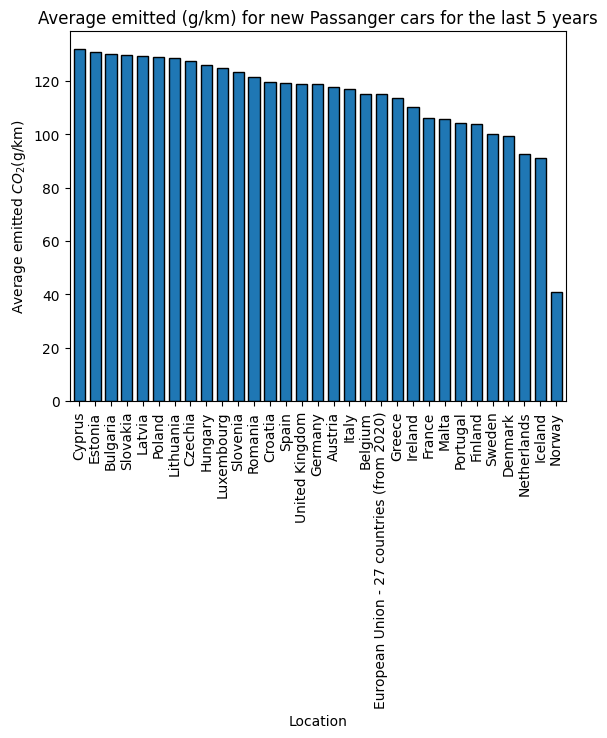

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data frame
data_frame = sdg_12_30_data_frame.copy()
# Filter data for the last 5 years and group by geo and calculate the average
data_frame = data_frame \
    .query('TIME_PERIOD >= "2019-01-01"') \
    .groupby("geo", observed=False, as_index=False) \
    .agg({"emitted_co2": "mean"}) \
    .sort_values(by="emitted_co2", ascending=False) \
    .reset_index()

# Merge with GEO code list to use the GEO full name instead of abbrivations in the plot
data_frame = data_frame.merge(geo_data_frame, right_on="abbr", left_on="geo")

# Plot
ax = data_frame.plot(kind="bar", x="geo_full_name", y="emitted_co2", width=0.7, legend=False, edgecolor='black')
ax.set_xlabel("Location")
ax.set_ylabel("Average emitted $CO_2$(g/km)")
ax.set_title("Average emitted (g/km) for new Passanger cars for the last 5 years")
plt.show()

### $CO_2$ emissions in [2019 - 2020]

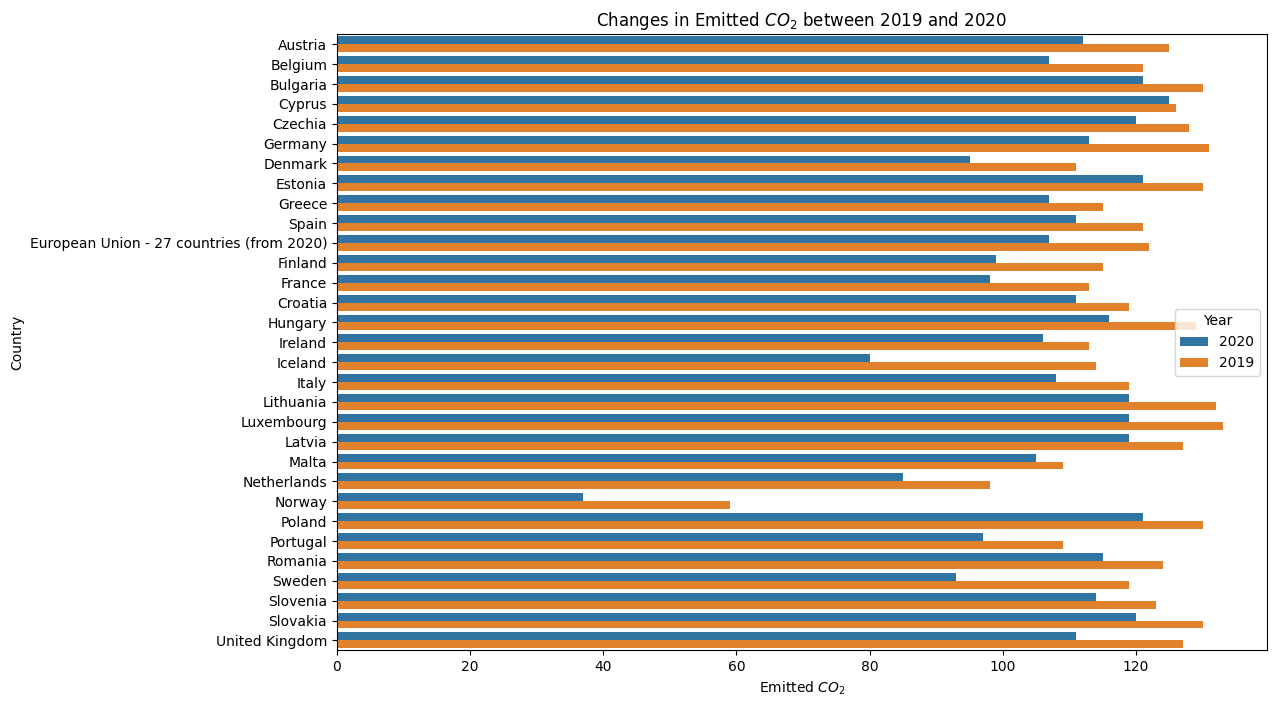

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy data frame
data_frame = sdg_12_30_data_frame.copy()
# Merge with GEO code list to use the GEO full name instead of abbrivations in the plot
data_frame = data_frame.merge(geo_data_frame, right_on="abbr", left_on="geo")

data_2019 = data_frame \
    .query('TIME_PERIOD == "2019-01-01"') \
    .reset_index(drop=True)

data_2020 = data_frame \
    .query('TIME_PERIOD == "2020-01-01"') \
    .reset_index(drop=True)

df_combined = pd.concat([data_2020, data_2019], axis=0)
df_combined['TIME_PERIOD'] = df_combined['TIME_PERIOD'].dt.strftime('%Y')
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='emitted_co2', y='geo_full_name', hue='TIME_PERIOD', data=df_combined)
plt.xlabel('Emitted $CO_2$')
plt.ylabel('Country')
plt.legend(title="Year")
plt.title('Changes in Emitted $CO_2$ between 2019 and 2020')
plt.show()

### $CO_2$ emissions for `Germany` over the time

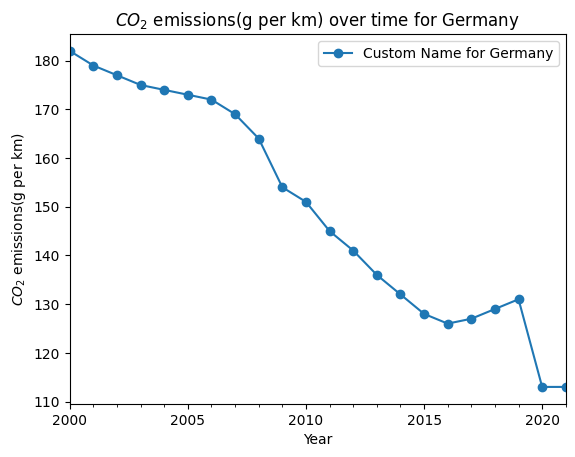

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data frame
data_frame = sdg_12_30_data_frame.copy()
germany_data = data_frame[data_frame['geo'] == 'DE']

# Plot
ax = germany_data.plot(x='TIME_PERIOD', y='emitted_co2', marker='o', linestyle='-', label='$CO_2$(g/km)')
ax.legend(labels=['Custom Name for Germany'])
ax.set_xlabel('Year')
ax.set_ylabel('$CO_2$ emissions(g per km)')
ax.set_title('$CO_2$ emissions(g per km) over time for Germany')
plt.show()

As it is shown in the graph, Germany demonstrated success in reducing $CO_2$ emissions over the years. A noticeable steep slope is observed from 2019 to 2020, attributed to the impact of the Corona situation on the data. Further details regarding this phenomenon will be discussed in the [limitations](#Limitations) and [future work](#Future-work) section.

### Distribution of $CO_2$ emissions for `Germany` over the time

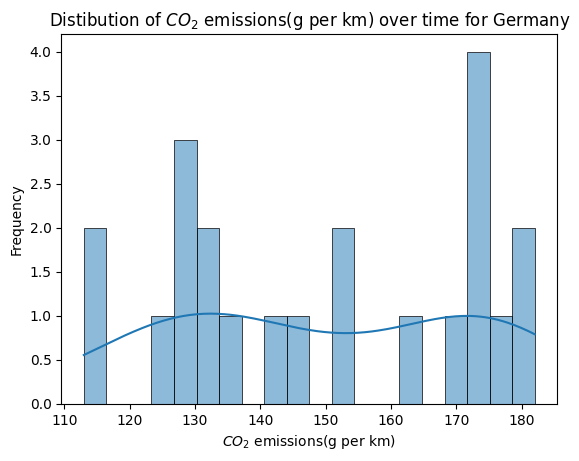

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy data frame
data_frame = sdg_12_30_data_frame.copy()
germany_data = data_frame[data_frame['geo'] == 'DE']

# Plot
ax = sns.histplot(data=germany_data, x="emitted_co2", kde=True, bins=20, linewidth=0.5)
ax.set_xlabel('$CO_2$ emissions(g per km)')
ax.set_ylabel('Frequency')
ax.set_title('Distibution of $CO_2$ emissions(g per km) over time for Germany')
plt.show()

## New passenger cars by type of motor energy

### Average new passenger cars by type of motor energy for each location

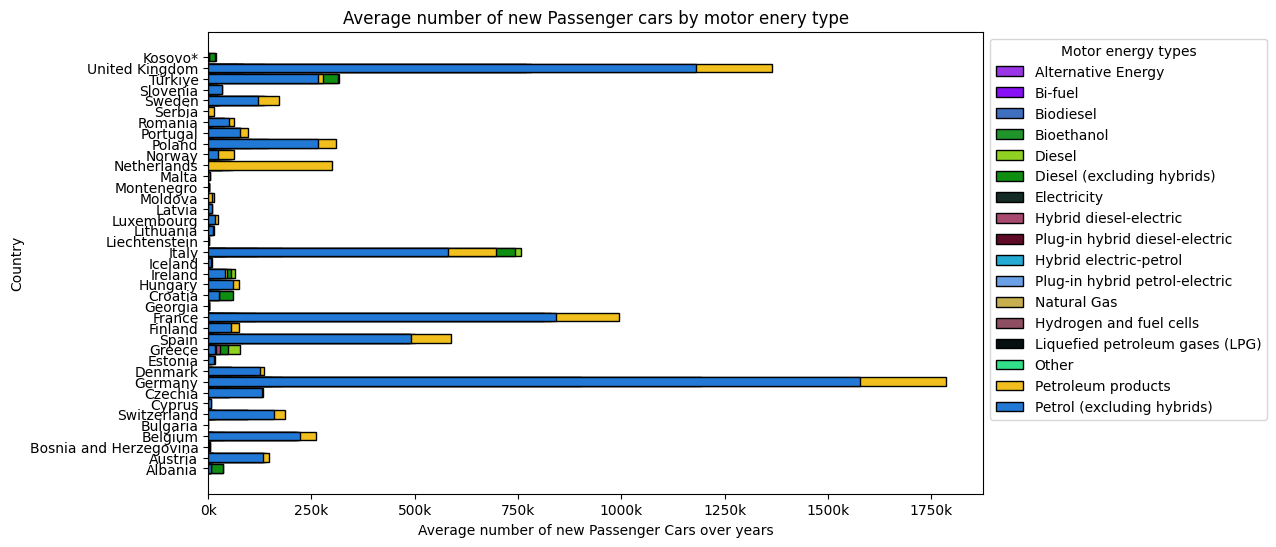

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Calculate average for each combination of "mot_nrg" and "geo"
data_frame = data_frame \
    .groupby(["mot_nrg", "geo"], observed=False, as_index=False) \
    .agg({"n_passenger_cars": "mean"})\
    .reset_index(drop=True)


# Merge this data source with GEO and Motor energy side data sources which contain the full abbreviation names 
average_data_frame = data_frame.merge(geo_data_frame, left_on = "geo",right_on = "abbr")  
average_data_frame = average_data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr") 
# Generate random colors for each "mot_nrg"
colors = {mot_nrg: np.random.rand(3,) for mot_nrg in data_frame["mot_nrg"].unique()}
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for mot_nrg, group in average_data_frame.groupby("mot_nrg", observed=False):
    ax.barh(group["geo_full_name"], group["n_passenger_cars"], color=colors[mot_nrg], label=group["motor_energy_full_name"].iloc[0], edgecolor='black')

ax.set_xlabel("Average number of new Passenger Cars over years")
ax.set_ylabel("Country")
ax.set_title("Average number of new Passenger cars by motor enery type")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1000:.0f}k"))
ax.legend(bbox_to_anchor=(1, 1), title="Motor energy types")
plt.show()

### Average new passenger cars by type of motor energy

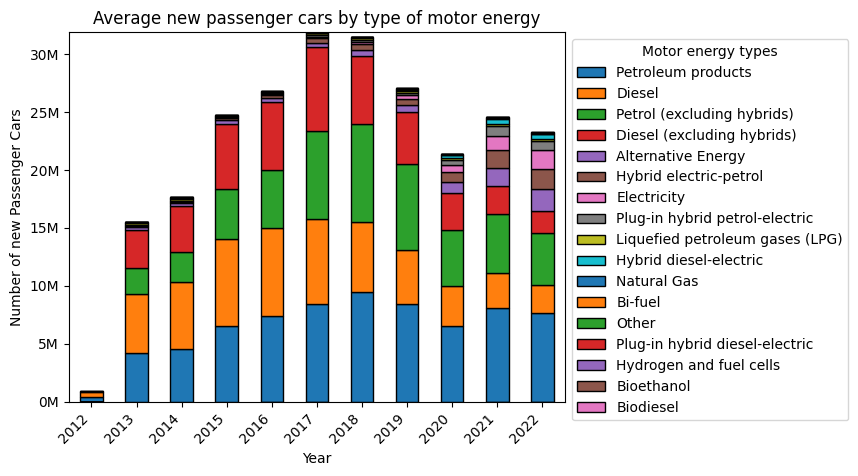

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Calculate average for each combination of "mot_nrg" and "TIME_PERIOD"
data_frame = data_frame \
    .groupby(["mot_nrg","TIME_PERIOD"], as_index=False, observed=False) \
    .agg({"n_passenger_cars":"sum"})\
    .reset_index(drop=True)

data_frame = data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr") 
# Set "motor_energy_full_name" as a categorical column
data_frame["motor_energy_full_name"] = data_frame["motor_energy_full_name"].astype("category")
pivot_df = data_frame.pivot_table(index="TIME_PERIOD", columns="motor_energy_full_name", values="n_passenger_cars", aggfunc="sum")
pivot_df = pivot_df.loc[:, pivot_df.sum().sort_values(ascending=False).index]
ax = pivot_df.plot(kind="bar", stacked=True, edgecolor='black')
ax.set_xlabel("Year")
ax.set_ylabel("Number of new Passenger Cars")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1000000:.0f}M"))
ax.set_xticklabels([pd.to_datetime(val).strftime('%Y') for val in pivot_df.index.get_level_values(0)], rotation=45, ha='right')
ax.set_title("Average new passenger cars by type of motor energy")
ax.legend(bbox_to_anchor=(1, 1), title="Motor energy types")
plt.show()

### New passanger cars for `Germany` by motor enery type over time

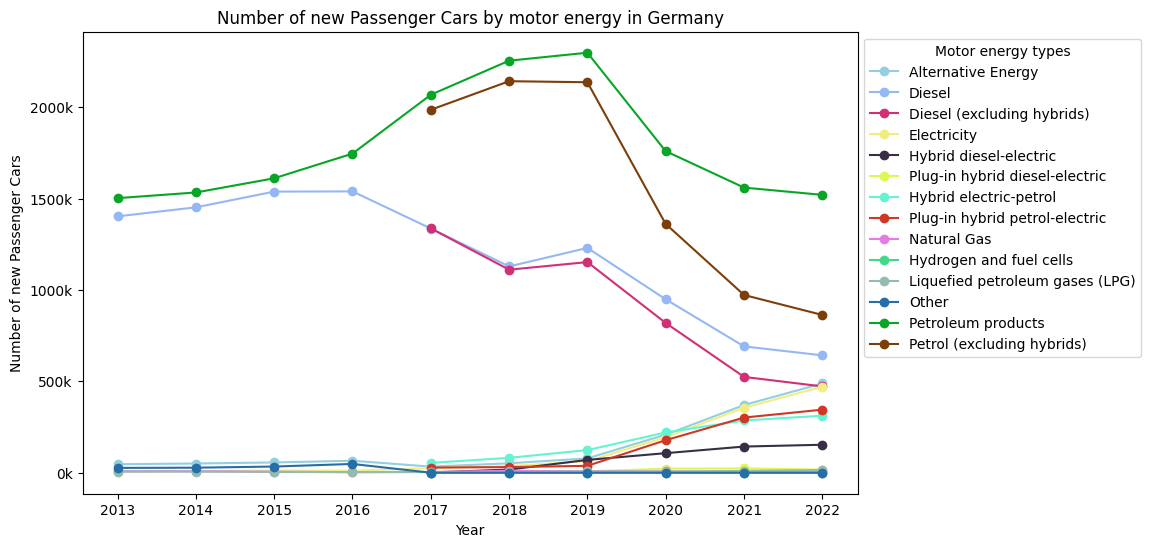

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Filter data for Germany
data_frame = data_frame[data_frame['geo'] == 'DE']
# Merge this data source with GEO and Motor energy side data sources which contain the full abbreviation names 
germany_data_frame = data_frame.merge(geo_data_frame, left_on = "geo",right_on = "abbr")  
germany_data_frame = germany_data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr") 
# Generate random colors for each 'mot_nrg'
colors = {mot_nrg: np.random.rand(3,) for mot_nrg in germany_data_frame['mot_nrg'].unique()}
# Create the line chart
fig, ax = plt.subplots(figsize=(10, 6))
for mot_nrg, group in germany_data_frame.groupby('mot_nrg', observed=False):
    ax.plot(group['TIME_PERIOD'], group['n_passenger_cars'], color=colors[mot_nrg], label=group['motor_energy_full_name'].iloc[0], marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Number of new Passenger Cars')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))
ax.set_title('Number of new Passenger Cars by motor energy in Germany')
ax.legend(bbox_to_anchor=(1, 1), title='Motor energy types')
plt.show()

### Distribution of motor types in 2022 in Germany

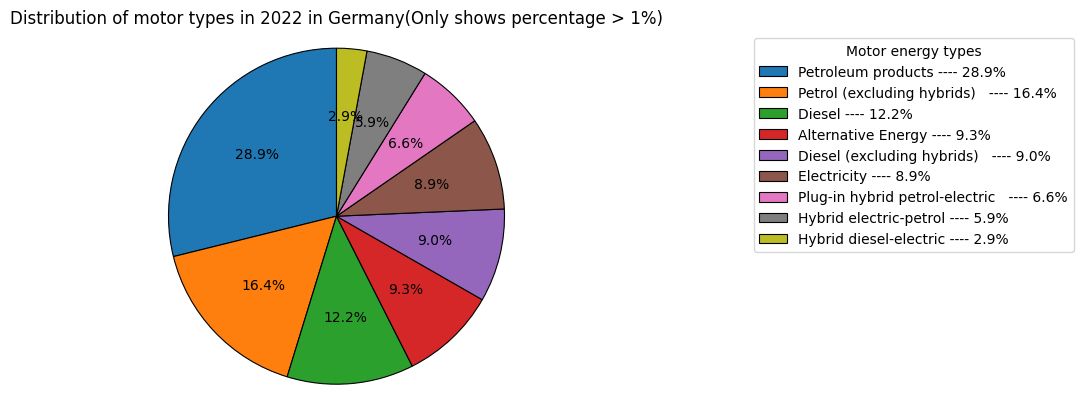

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Filter data for Germany and the year 2022
germany_2022_data = data_frame \
    .query('(geo == "DE") & (TIME_PERIOD == "2022-01-01")') \
    .reset_index(drop=True)
# Filter the rows that have less than 1% of all new passanger cars
germany_2022_data = germany_2022_data[germany_2022_data["n_passenger_cars"] / germany_2022_data["n_passenger_cars"].sum() >= 0.01]
# Calculate the percentage and add it as a new column
germany_2022_data["percentage"] = germany_2022_data["n_passenger_cars"] / germany_2022_data["n_passenger_cars"].sum() * 100.0
# Merge with motor name df
germany_2022_data = germany_2022_data.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr") 
# Sort data frame based on the "percentages"
germany_2022_data = germany_2022_data.sort_values(by="percentage", ascending=False)
# Plot
fig, ax = plt.subplots()
labels = ["{} ---- {:.1f}%".format(row["motor_energy_full_name"], row["percentage"]) for _,row in germany_2022_data.iterrows()]
ax.pie(germany_2022_data["n_passenger_cars"], autopct="%1.1f%%", startangle=90, rotatelabels =True, pctdistance=0.6, wedgeprops={"linewidth": 0.8, "edgecolor": "black", 'antialiased': True})
ax.axis("equal")
ax.legend(bbox_to_anchor=(2, 1), title="Motor energy types", labels=labels)
ax.set_title("Distribution of motor types in 2022 in Germany(Only shows percentage > 1%)")
plt.show()

### Highest number of new Passenger car with petroleum product motor enery in 2020

In [34]:
motor_engin_data_frame.head()

,abbr,motor_energy_full_name
0,PET,Petroleum products
1,LPG,Liquefied petroleum gases (LPG)
2,DIE,Diesel
3,STM,Steam
4,GAS,Natural Gas


In [35]:
import pandas as pd

# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Merge with GEO code list to use the GEO full name instead of abbrivations in the plot
data_frame = data_frame.merge(geo_data_frame, right_on="abbr", left_on="geo").drop(["abbr","geo"], axis=1)
# Merge with motor name df
data_frame = data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr").drop(["abbr"], axis=1)

data_frame \
    .query('TIME_PERIOD == "2020-01-01" & mot_nrg == "PET"') \
    .sort_values(by='n_passenger_cars', ascending=False) \
    .drop(["mot_nrg", "TIME_PERIOD", "motor_energy_full_name"], axis=1) \
    .reset_index(drop=True) \
    .head()

,n_passenger_cars,geo_full_name
0,1760071,Germany
1,1025021,France
2,773479,Italy
3,561541,Spain
4,334136,Poland


## Changes in motor type for new registered car in Norway

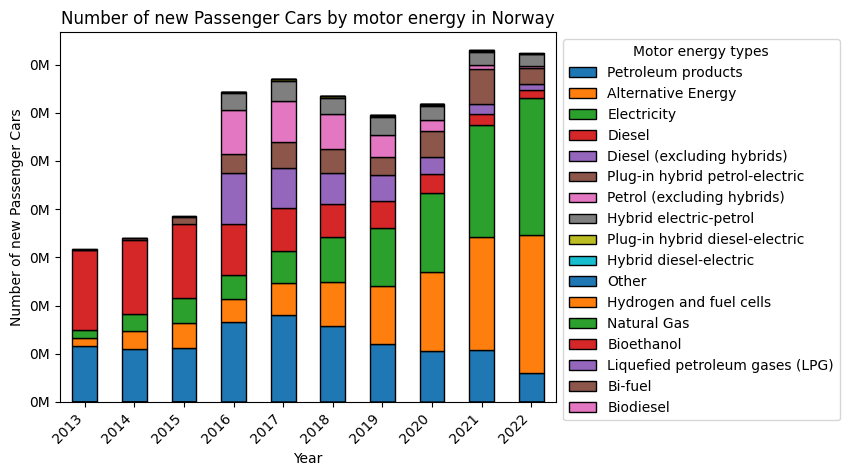

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


# Copy data frame
data_frame = road_eqr_carpda_data_frame.copy()
# Calculate average for each combination of "mot_nrg" and "TIME_PERIOD"
data_frame = data_frame \
    .query('geo == "NO"') \
    .groupby(["mot_nrg","TIME_PERIOD", 'geo'], as_index=False, observed=False) \
    .agg({"n_passenger_cars":"sum"})\
    .reset_index(drop=True)

data_frame = data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr") 
# Set "motor_energy_full_name" as a categorical column
data_frame["motor_energy_full_name"] = data_frame["motor_energy_full_name"].astype("category")
pivot_df = data_frame.pivot_table(index="TIME_PERIOD", columns="motor_energy_full_name", values="n_passenger_cars", aggfunc="sum")
pivot_df = pivot_df.loc[:, pivot_df.sum().sort_values(ascending=False).index]
ax = pivot_df.plot(kind="bar", stacked=True, edgecolor='black')
ax.set_xlabel("Year")
ax.set_ylabel("Number of new Passenger Cars")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1000000:.0f}M"))
ax.set_xticklabels([pd.to_datetime(val).strftime('%Y') for val in pivot_df.index.get_level_values(0)], rotation=45, ha='right')
ax.set_title("Number of new Passenger Cars by motor energy in Norway")
ax.legend(bbox_to_anchor=(1, 1), title="Motor energy types")
plt.show()

---

### Merge data sources

The two main datasets can be merged together on the `geo` and `TIME_PERIOD` columns to connect the $CO_2$ emission for new Passenger cars and number of new registered cars.

In [37]:
# Copy data frames
data_frame_passenger = road_eqr_carpda_data_frame.copy()
data_frame_co2 = sdg_12_30_data_frame.copy()
merge_on = ['TIME_PERIOD','geo']
merged_data_frame = pd.merge(data_frame_passenger, data_frame_co2, on=merge_on, how="inner").reset_index(drop=True)
merged_data_frame.head()

,mot_nrg,geo,TIME_PERIOD,n_passenger_cars,emitted_co2
0,ALT,AT,2013-01-01,1285,131
1,BIFUEL,AT,2013-01-01,176,131
2,DIE,AT,2013-01-01,181061,131
3,DIE_X_HYB,AT,2013-01-01,180901,131
4,ELC,AT,2013-01-01,654,131


###  $CO_2$ emission vs. new Passenger cars by year

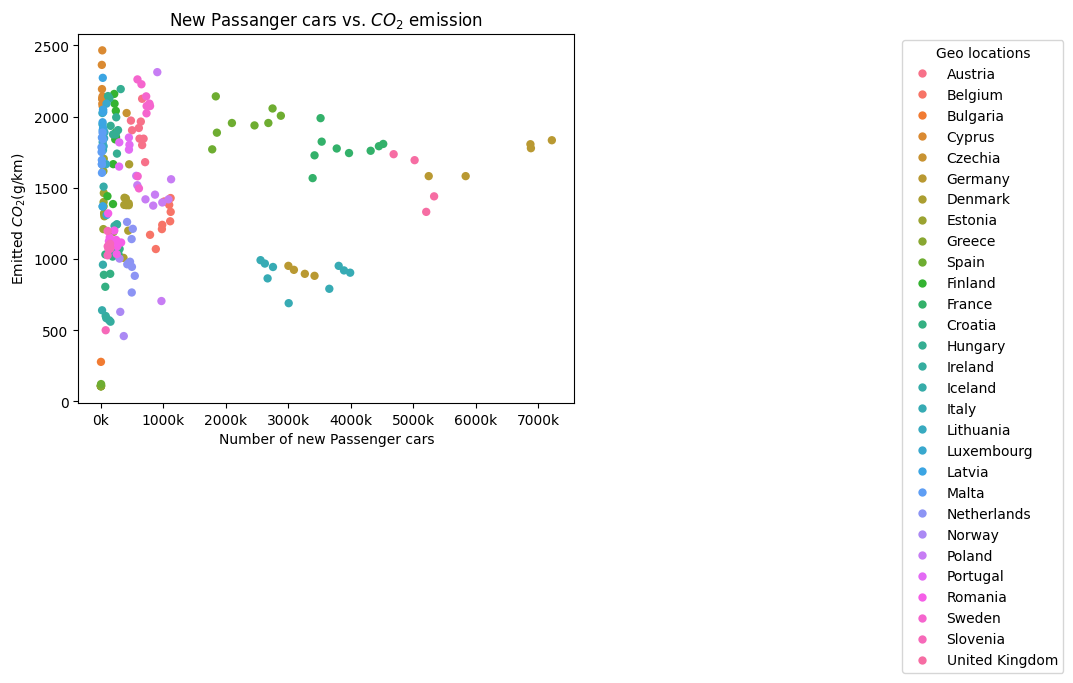

In [38]:
# Copy merged data frame
# Copy data frames
data_frame = merged_data_frame.copy()
# Sum up all the different motor types
data_frame = data_frame \
    .groupby(['geo','TIME_PERIOD'], as_index=False, observed=False) \
    .agg({'n_passenger_cars':'sum', 'emitted_co2': 'sum'})\
    .reset_index(drop=True)
# Merge with GEO code list to use the GEO full name instead of abbrivations in the plot
data_frame = data_frame.merge(geo_data_frame, right_on="abbr", left_on="geo")
ax = sns.scatterplot(x="n_passenger_cars", y="emitted_co2",
                hue="geo_full_name",
                sizes=(1, 8), linewidth=0,
                data=data_frame)

ax.set_xlabel('Number of new Passenger cars')
ax.set_ylabel('Emitted $CO_2$(g/km)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))
ax.set_title('New Passanger cars vs. $CO_2$ emission')
ax.legend(bbox_to_anchor=(2, 1), title='Geo locations')
plt.show()

### $CO_2$ emission vs. new Passenger cars vs. motor energy

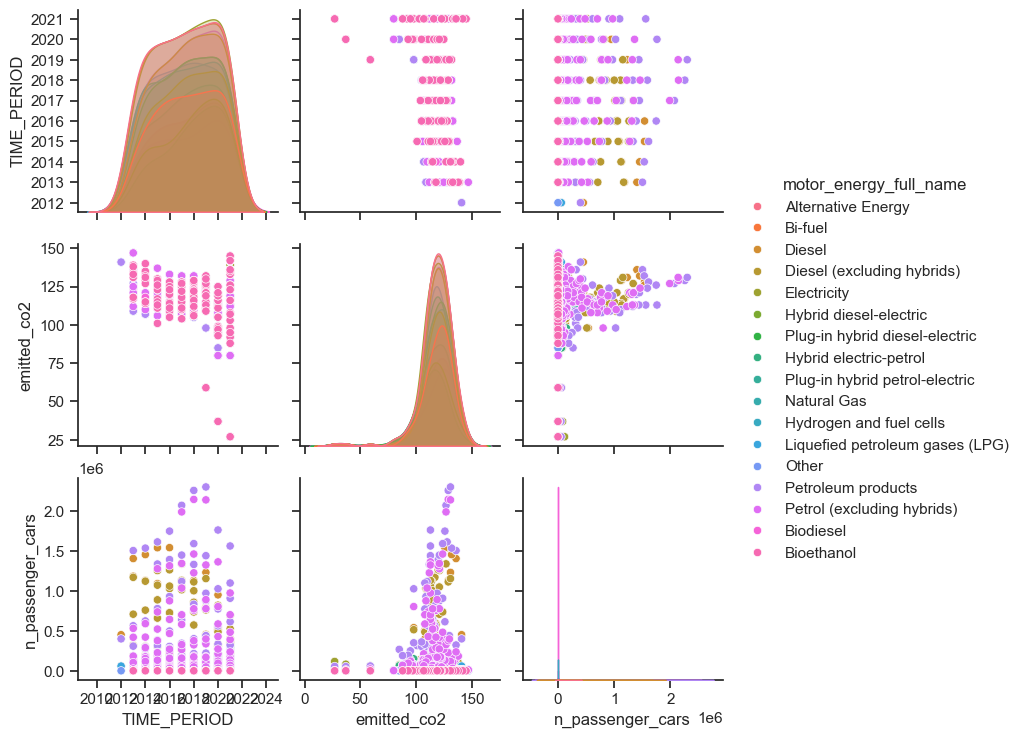

In [39]:
# Copy merged data frame
data_frame = merged_data_frame.copy()
# Merge with motor name df
data_frame = data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr").drop(["abbr"], axis=1)

# Plot
sns.set_theme(style="ticks")
ax = sns.pairplot(vars= ['TIME_PERIOD', 'emitted_co2', 'n_passenger_cars'], hue="motor_energy_full_name", data=data_frame)
plt.show()

### Correlation between $CO_2$ emission and new Passenger cars by time

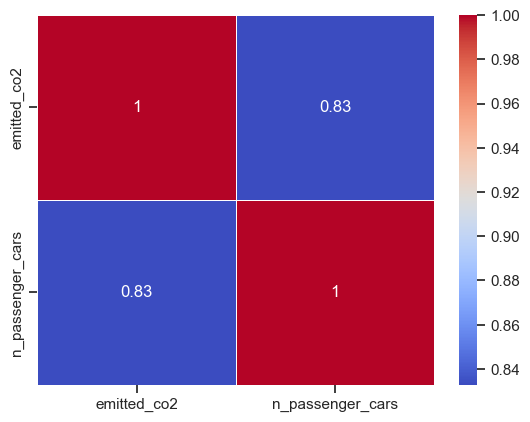

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy merged data frame
data_frame = merged_data_frame.copy()
# Merge with motor name df
data_frame = data_frame.merge(motor_engin_data_frame, left_on = "mot_nrg", right_on = "abbr").drop(["abbr"], axis=1).reset_index(drop=True)
# Sum up the factors for groups
data_frame = data_frame \
    .groupby(['TIME_PERIOD'], as_index=False, observed=False) \
    .agg({'n_passenger_cars':'sum', 'emitted_co2': 'sum'})\
    .reset_index(drop=True)
# Plot
corr_df = data_frame[['emitted_co2', 'n_passenger_cars']].corr()
ax = sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# Conclusion

Cutting down on greenhouse gas emissions is essential to slow down global warming and reduce its impact on the environment and human health.

[Average $CO_2$ emissions for each country over the last 5 years](#Average-CO2-emissions-for-each-country-over-the-last-5-years) indicates a consistent decrease in greenhouse gas(GHG) emissions over the last 5 years. Certain countries exhibit more significant changes, with Norway being one of them. Due to data limitations, information for Norway is available only from 2019 onwards. In order to gain a better understanding of Norway's efforts to reduce $CO_2$ emissions, an evaluation involves comparing the available data for 2019 and 2020.

Analyzing the $CO_2$ emissions from newly registered cars in the EU indicates that Iceland, Norway, and the United Kingdom, there was a substantial 12% decrease in 2020 compared to 2019 levels (refer to [CO2 emissions in- \[2019--2020\]](#CO2-emissions-in-[2019---2020])).

Examining motor types in Norway is crucial due to their notable effectiveness in reducing $CO_2$ emissions. The data presented in [Changes in motor type for new registered car in Norway](#Changes-in-motor-type-for-new-registered-car-in-Norway) illustrates a substantial increase in electric cars from 2019 to 2020 in the country.


[Average new passenger cars by type of motor energy for each location](#Average-new-passenger-cars-by-type-of-motor-energy-for-each-location) indicates that the majority of newly registered passenger cars in recent years mainly utilize either pure petroleum or one of its derivatives. It is crucial to examine the evolving trends in motor type preferences over time. This analysis is conducted in the [Average New Passenger Cars by Type of Motor Energy](#Average-new-passenger-cars-by-type-of-motor-energy).

Germany stands out as one of the major producers of $CO_2$ emissions from petrol. The evolution of motor type preferences over time is illustrated in the data on new passenger cars for Germany, as depicted in [New passanger cars for Germany by motor enery type over time](#New-passanger-cars-for-Germany-by-motor-enery-type-over-time). According to the statistics presented in [Distribution of CO2 emissions for Germany over the time](#Distribution-of-CO2-emissions-for-Germany-over-the-time), it is evident that Germany mainly opts for petrol engines over other cleaner alternatives in the majority of cases.


As illustrated in the section on $CO_2$ emissions for Germany over time (refer to [$CO_2$ emissions for Germany over the time](#CO2-emissions-for-Germany-over-the-time)), the country has shown significant success in decreasing $CO_2$ emissions throughout the years. A distinct and steep decline is evident from 2019 to 2020, which can be attributed to the impact of the COVID-19 pandemic on the data. Further details on this phenomenon will be discussed in the sections on limitations (refer to [Limitations](#Limitations) and future work (refer to [Future-work](#Future-work)).

The report also includes a correlation check between various numerical values to present the found insights in other forms as well.

## Limitations

Since 2021, the emissions are measured with a new test procedure (Worldwide harmonized Light vehicles Test Procedure WLTP), compared to the New European Driving Cycle (NEDC) procedure used until 2020. The WLTP aims to reflect better real driving conditions and WLTP values are systematically higher than NEDC values. This change leads to a break in time series between 2020 and 2021. $^5$


The $CO_2$ emission data lacks information for the year 2023, and significant fluctuations occurred from 2019 to 2021, primarily attributed to the COVID-19 situation.

There are some missing data for years prior to 2017 for some motor types.(Refer to [Germany data](#New-passanger-cars-for-Germany-by-motor-enery-type-over-time))

## Future work

It is recommended to explore data sources that provide in-depth details about cars, like open data from factories sharing their greenhouse gas (GHG) emissions during production. The impact on the environment goes beyond just using the car, and it's crucial to look at the whole life cycle. For example, if making electric cars produces a lot of GHG emissions, that's an important factor to think of. So, including data from the manufacturing phase is really important to get a complete picture of how different types of motors affect the environment.
A comparative analysis allows for understanding tradeoffs between different motor types. If one type of vehicle has higher manufacturing emissions but significantly lower operational emissions, it's important to weigh these factors when considering the overall environmental impact.

To gain a comprehensive understanding of how one type of motor energy impacts greenhouse gas (GHG) emissions compared to another, it is advisable to incorporate additional data sources. For instance, analyzing data on the age of newly registered cars could provide valuable insights into how emissions evolve over time.
Understanding how GHG emissions change as vehicles age can inform policy decisions. For example, it can help policymakers assess the effectiveness of emissions standards and regulations over the lifespan of a vehicle.

In Germany, there is available open data on the car market, providing access to information about new cars in the market that potential buyers may consider. Utilizing the data from these sources, models can be developed to train for $CO_2$ emissions. Users can then choose specific parameters for their preferred car, enabling them to compare and make informed decisions based on $CO_2$ emissions. This approach allows users to comprehend the environmental impact, illustrating how each selected car contributes a specific amount of $CO_2$ emissions per kilometer, empowering them to make environmentally conscious decisions.

# Refernces and Footnotes

**[1]**: A passenger car is a road motor vehicle, other than a moped or a motor cycle, intended for the carriage of passengers and designed to seat no more than nine persons (including the driver). The term passenger car also covers microcars (small cars which, depending on individual Member State legislation, may need no permit to be driven and/ or benefit from lower vehicle taxation), taxis and other hired passenger cars, provided that they have fewer than 10 seats in total. This category may also includes vans designed and used primarily for transport of passengers, as well as ambulances and motor homes. Excluded are light goods road vehicles, as well as motor coaches and buses and mini-buses/mini-coaches. [more...](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Passenger_car)

**[2]**: EC, 2021, Communication from the Commission to the European Parliament, the Council, the European Economic and Social Committee and the Committee of the Regions ‘Fit for 55’: delivering the EU’s 2030 Climate Target on the way to climate neutrality, COM(2021) 550 final

**[3]**: TERM: Transport and environment report 2022

**[4]**: Gavurova, Beata et al. “Greenhouse Gas Emissions and Health in the Countries of the European Union.” Frontiers in public health vol. 9 756652. 10 Dec. 2021, doi:10.3389/fpubh.2021.756652

**[5]**: https://ec.europa.eu/eurostat/cache/metadata/en/sdg_12_30_esmsip2.htm
